In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [ ]:
# Read your dataset
df= pd.read_csv("TATAMOTORS.csv")

In [ ]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
0,03-01-2000,TATAMOTORS,EQ,201.60,207.4,217.25,207.4,217.0,216.75,214.28,676126,1.450000e+13
1,04-01-2000,TATAMOTORS,EQ,216.75,217.0,219.00,206.0,211.9,208.20,209.50,679215,1.420000e+13
2,05-01-2000,TATAMOTORS,EQ,208.20,194.0,217.80,194.0,213.1,213.25,210.33,1120951,2.360000e+13
3,06-01-2000,TATAMOTORS,EQ,213.25,215.0,229.90,215.0,222.0,222.10,225.29,1968998,4.440000e+13
4,07-01-2000,TATAMOTORS,EQ,222.10,224.0,239.90,223.1,239.9,239.90,236.32,2199431,5.200000e+13


In [ ]:
#Checking size of data
df.shape

(5306, 12)

In [ ]:
#Viewing datatypes of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        5306 non-null   object 
 1   Symbol      5306 non-null   object 
 2   Series      5306 non-null   object 
 3   Prev Close  5306 non-null   float64
 4   Open        5306 non-null   float64
 5   High        5306 non-null   float64
 6   Low         5306 non-null   float64
 7   Last        5306 non-null   float64
 8   Close       5306 non-null   float64
 9   VWAP        5306 non-null   float64
 10  Volume      5306 non-null   int64  
 11  Turnover    5306 non-null   float64
dtypes: float64(8), int64(1), object(3)
memory usage: 497.6+ KB


In [ ]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03
mean,409.432878,410.152752,417.122512,402.179438,409.451828,409.450264,409.761357,1.046560e+07,2.790833e+14
std,272.483585,272.966475,277.018798,268.028297,272.516903,272.473264,272.491123,2.185034e+07,4.674678e+14
min,58.800000,58.000000,60.700000,57.550000,58.750000,58.800000,59.240000,1.235100e+04,1.070000e+11
25%,174.600000,174.762500,178.825000,171.012500,174.725000,174.600000,175.182500,1.668994e+06,7.050000e+13
50%,377.250000,378.900000,384.750000,372.600000,377.525000,377.250000,378.465000,4.141648e+06,1.970000e+14
75%,523.150000,523.475000,530.800000,515.912500,523.487500,523.150000,523.715000,8.706037e+06,3.180000e+14
max,1365.150000,1361.000000,1382.000000,1347.000000,1362.000000,1365.150000,1362.150000,3.905778e+08,9.370000e+15


In [ ]:
#Displaying the count of null values
null_values=df.isnull().sum()
print(null_values)

Date          0
Symbol        0
Series        0
Prev Close    0
Open          0
High          0
Low           0
Last          0
Close         0
VWAP          0
Volume        0
Turnover      0
dtype: int64


In [ ]:
# Data preprocessing
df["Date"] = pd.to_datetime(df["Date"], format="%d-%m-%Y")
df.set_index("Date", inplace=True)
data = df["Close"].values.reshape(-1, 1)

In [ ]:
# Sorting data
data_tata = df.sort_index(ascending=True, axis=0)

In [ ]:
# Feature scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [ ]:
# Split data into training and testing sets
training_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:training_size, :]
test_data = scaled_data[training_size:, :]

In [ ]:
# Create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

seq_length = 60
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)


In [ ]:
# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

In [ ]:
# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
model.fit(X_train, y_train, epochs=1, batch_size=1, verbose=2)


4184/4184 - 115s - loss: 0.0010 - 115s/epoch - 28ms/step


In [ ]:
# Make predictions for the next 2 years (assuming daily predictions)
future_dates = pd.date_range(start=df.index[-1], periods=730, freq='D')
future_dates = future_dates[1:]  # Exclude the last date already present in the dataset
future_data = []

In [ ]:
# Make predictions for the next 4 years (assuming daily predictions)
future_data = np.array([])  # Initialize an empty numpy array

# Use the last `seq_length` data points as input for prediction
inputs = scaled_data[-seq_length:]
for i in range(len(future_dates)):
    X_future = np.array(inputs[-seq_length:]).reshape(1, seq_length, 1)
    prediction = model.predict(X_future)[0][0]
    # Introduce noise to the prediction
    noise = np.random.normal(0, 0.005)  # Adjust the standard deviation to control the level of volatility
    prediction_with_noise = prediction + noise
    # Concatenate the new prediction with the existing predictions
    future_data = np.concatenate((future_data, [prediction_with_noise]))

    # Append the predicted value to the input sequence for the next prediction
    inputs = np.append(inputs[1:], prediction_with_noise).reshape(-1, 1)


1/1 [==============================] - 0s 24ms/step


In [ ]:
# Inverse transform the predicted data
future_data = scaler.inverse_transform(future_data.reshape(-1, 1))

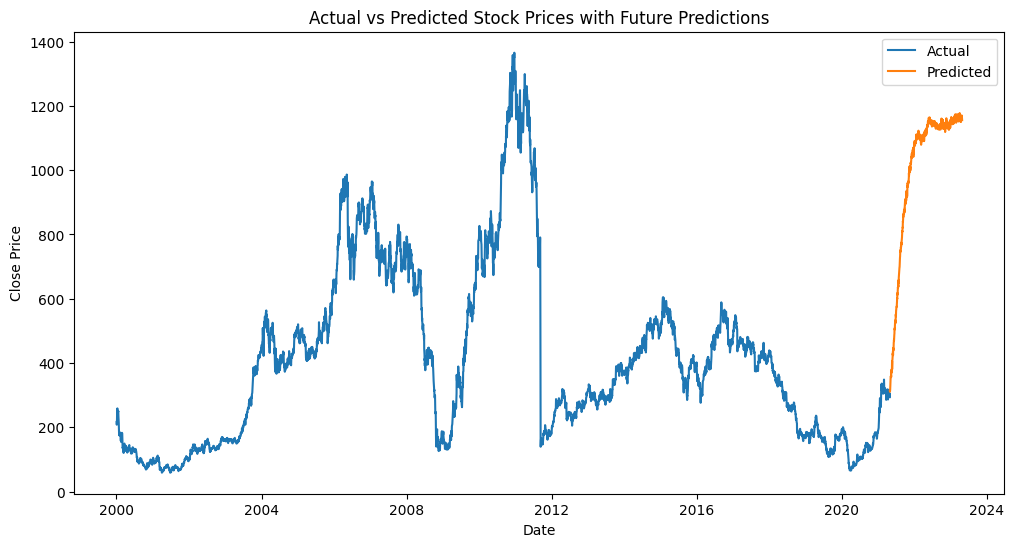

In [ ]:
# Plot actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close"], label='Actual')
plt.plot(future_dates, future_data, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Stock Prices with Future Predictions')
plt.legend()
plt.show()